## Calculating Covariance and Correlation

Consider a portfolio composed of *Walmart* and *Facebook*. Do you expect the returns of these companies to show high or low covariance? Or, could you guess what the correlation would be? Will it be closer to 0 or closer to 1? 

Begin by extracting data for Walmart and Facebook from the 1st of January 2014 until today.

In [26]:
import numpy as np
import pandas as pd
import pandas_datareader.data as wb
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
tickers=['FB','WMT']

data=pd.DataFrame()

for i in tickers:
    data[i]=wb.DataReader(i, data_source='yahoo', start='2014-1-1' )['Adj Close']

In [28]:
data.fillna(value=0)

,FB,WMT
Date,,
2014-01-02,54.709999,66.984100
2014-01-03,54.560001,66.763397
2014-01-06,57.200001,66.389908
2014-01-07,57.919998,66.593628
2014-01-08,58.230000,66.067329
2014-01-09,57.220001,66.288025
2014-01-10,57.939999,66.245590
2014-01-13,55.910000,65.778687
2014-01-14,57.740002,66.177673


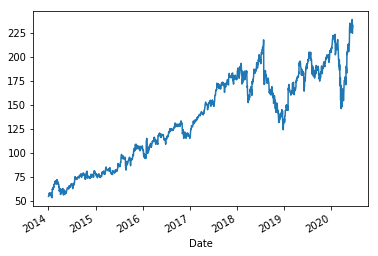

In [29]:
data['FB'].plot()

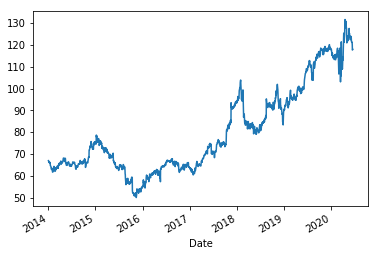

In [30]:
data['WMT'].plot()

In [31]:
returns_wmt=np.log(data['WMT']/data['WMT'].shift(1))

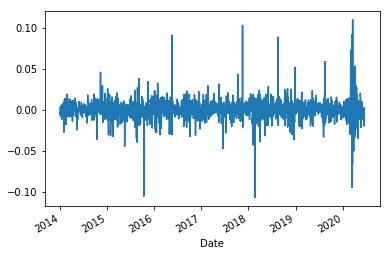

In [32]:
returns_wmt.plot()

Repeat the process we went through in the lecture for these two stocks. How would you explain the difference between their means and their standard deviations?

In [33]:
returns_fb=np.log(data['FB']/data['FB'].shift(1))

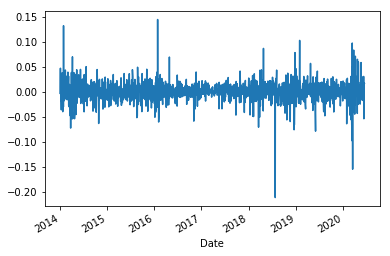

In [34]:
returns_fb.plot()

In [41]:
print ("Daily returns and standard deviation Facebook")
print ("Daily mean return {:.6f}".format(returns_fb.mean()))
print ("Daily standard deviation {:.6f}".format(returns_fb.std()))
print ("")

print ("Daily returns and standard deviation Walmart")
print ("Daily mean return {:.6f}".format(returns_wmt.mean()))
print ("Daily standard deviation {:.6f}".format(returns_wmt.std()))

Daily returns and standard deviation Facebook
Daily mean return 0.000891
Daily standard deviation 0.020084

Daily returns and standard deviation Walmart
Daily mean return 0.000349
Daily standard deviation 0.013124


In [42]:
print ("Annual returns and standard deviation Facebook")
print ("Annual mean return {:.6f}".format(returns_fb.mean()*250))
print ("Annual standard deviation {:.6f}".format(returns_fb.std()*250**0.5))
print ("")

print ("Annual returns and standard deviation Walmart")
print ("Annual mean return {:.6f}".format(returns_wmt.mean()*250))
print ("Annual standard deviation {:.6f}".format(returns_wmt.std()*250**0.5))

Annual returns and standard deviation Facebook
Annual mean return 0.222866
Annual standard deviation 0.317559

Annual returns and standard deviation Walmart
Annual mean return 0.087324
Annual standard deviation 0.207506


Facebook stocks are more volatile, despite showing higher annual returns

***

## Covariance and Correlation


\begin{eqnarray*}
Covariance Matrix: \  \   
\Sigma = \begin{bmatrix}
        \sigma_{1}^2 \ \sigma_{12} \ \dots \ \sigma_{1I} \\
        \sigma_{21} \ \sigma_{2}^2 \ \dots \ \sigma_{2I} \\
        \vdots \ \vdots \ \ddots \ \vdots \\
        \sigma_{I1} \ \sigma_{I2} \ \dots \ \sigma_{I}^2
    \end{bmatrix}
\end{eqnarray*}

Covariance matrix:

In [48]:
all_returns_daily=pd.concat([returns_fb, returns_wmt], axis=1).fillna(value=0)
all_returns_daily.head()

,FB,WMT
Date,,
2014-01-02,0.000000,0.000000
2014-01-03,-0.002745,-0.003300
2014-01-06,0.047253,-0.005610
2014-01-07,0.012509,0.003064
2014-01-08,0.005338,-0.007935


In [49]:
all_returns_daily.cov()

,FB,WMT
FB,0.000403,0.000061
WMT,0.000061,0.000172


In [51]:
all_returns_annual=pd.concat([returns_fb*250, returns_wmt*250], axis=1).fillna(value=0)

In [52]:
all_returns_annual.cov()

,FB,WMT
FB,25.195490,3.811877
WMT,3.811877,10.758104


Correlation matrix:

In [53]:
all_returns_daily.corr()

,FB,WMT
FB,1.000000,0.231531
WMT,0.231531,1.000000


Calculating the correlation of
annual returns is kind of redudant bc it gives the same result, but here goes anyway

In [54]:
all_returns_annual.corr()

,FB,WMT
FB,1.000000,0.231531
WMT,0.231531,1.000000


Would you consider investing in such a portfolio?

Yes, these stocks are poorly correlated.